In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
import decoupler as dc

sns.set_context("paper", font_scale=2) # set some nice global plotting settings.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
tissue = 'Liver'

In [3]:
plate_palette = sns.color_palette("husl", n_colors=3)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


In [4]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_processed.h5ad')



In [6]:
adata

AnnData object with n_obs × n_vars = 745880 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'Multiplexed_sample1', 'Multiplexed_sample2', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_u

In [6]:
adata.obs.head()

lab_sample_id sample     plate    subpool  \
cellID                                                                        
E10_C4_G9_Subpool_4_igvf_004  037_129S1J_10M_05     NA  igvf_004  Subpool_4   
B9_H11_A3_Subpool_4_igvf_004    070_NODJ_10F_05     NA  igvf_004  Subpool_4   
D9_B9_F4_Subpool_4_igvf_004       030_AJ_10F_05     NA  igvf_004  Subpool_4   
B11_E4_A3_Subpool_4_igvf_004     024_B6J_10F_05     NA  igvf_004  Subpool_4   
E12_D8_C6_Subpool_4_igvf_004  041_129S1J_10M_05     NA  igvf_004  Subpool_4   

                             SampleType Tissue     Sex     Age Genotype  \
cellID                                                                    
E10_C4_G9_Subpool_4_igvf_004     Nuclei  Liver    Male  PNM_02   129S1J   
B9_H11_A3_Subpool_4_igvf_004     Nuclei  Liver  Female  PNM_02     NODJ   
D9_B9_F4_Subpool_4_igvf_004      Nuclei  Liver  Female  PNM_02       AJ   
B11_E4_A3_Subpool_4_igvf_004     Nuclei  Liver  Female  PNM_02      B6J   
E12_D8_C6_Subpool_4_igvf_004     Nuclei  Liver    Male  PNM_02   129S1J   

                             subpool_type  ... total_counts_cb  \
cellID                                     ...                   
E10_C4_G9_Subpool_4_igvf_004           NO  ...        148637.0   
B9_H11_A3_Subpool_4_igvf_004           NO  ...        147807.0   
D9_B9_F4_Subpool_4_igvf_004            NO  ...        147843.0   
B11_E4_A3_Subpool_4_igvf_004           NO  ...        146366.0   
E12_D8_C6_Subpool_4_igvf_004           NO  ...        145665.0   

                             total_counts_mt_cb pct_counts_mt_cb  \
cellID                                                             
E10_C4_G9_Subpool_4_igvf_004             1330.0         0.894797   
B9_H11_A3_Subpool_4_igvf_004               55.0         0.037211   
D9_B9_F4_Subpool_4_igvf_004               898.0         0.607401   
B11_E4_A3_Subpool_4_igvf_004               83.0         0.056707   
E12_D8_C6_Subpool_4_igvf_004              234.0         0.160643   

                             doublet_score predicted_doublet  \
cellID                                                         
E10_C4_G9_Subpool_4_igvf_004      0.120823             False   
B9_H11_A3_Subpool_4_igvf_004      0.076923             False   
D9_B9_F4_Subpool_4_igvf_004       0.126437             False   
B11_E4_A3_Subpool_4_igvf_004      0.179012             False   
E12_D8_C6_Subpool_4_igvf_004      0.104126             False   

                             background_fraction cell_probability  \
cellID                                                              
E10_C4_G9_Subpool_4_igvf_004            0.001444         0.999955   
B9_H11_A3_Subpool_4_igvf_004            0.001716         0.999955   
D9_B9_F4_Subpool_4_igvf_004             0.001047         0.999955   
B11_E4_A3_Subpool_4_igvf_004            0.001610         0.999955   
E12_D8_C6_Subpool_4_igvf_004            0.001474         0.999955   

                                 cell_size droplet_efficiency leiden  
cellID                                                                
E10_C4_G9_Subpool_4_igvf_004  59953.851562                2.5     39  
B9_H11_A3_Subpool_4_igvf_004  59636.906250                2.5     30  
D9_B9_F4_Subpool_4_igvf_004   59613.703125                2.5     21  
B11_E4_A3_Subpool_4_igvf_004  59056.785156                2.5     26  
E12_D8_C6_Subpool_4_igvf_004  58769.351562                2.5     39  

[5 rows x 50 columns]

In [7]:
adata.var.head()

gene_id      gene_name     mt  highly_variable  \
gene_name                                                                    
4933401J01Rik  ENSMUSG00000102693.2  4933401J01Rik  False            False   
Gm26206        ENSMUSG00000064842.3        Gm26206  False            False   
Xkr4           ENSMUSG00000051951.6           Xkr4  False             True   
Gm18956        ENSMUSG00000102851.2        Gm18956  False            False   
Gm37180        ENSMUSG00000103377.2        Gm37180  False            False   

                      means  dispersions  dispersions_norm  
gene_name                                                   
4933401J01Rik  1.376541e-05     2.144272          0.511663  
Gm26206        1.000000e-12          NaN               NaN  
Xkr4           3.427822e-02     3.215298          1.747109  
Gm18956        7.988376e-05     2.093908          0.453567  
Gm37180        6.772005e-04     2.213524          0.591545

In [8]:
def stacked_barplot_proportions(adata, cluster_key, var_key, fsize=(12, 6), annotations=True, reverse_order=False, custom_order=None, custom_colors=None):
    colors = sns.color_palette("husl", n_colors=len(adata[var_key].unique()))

    # Group the data by 'cluster_key' and 'var_key', count occurrences, and calculate proportions
    grouped_data = adata.groupby([cluster_key, var_key]).size().unstack().fillna(0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Apply custom order if provided
    if custom_order:
        proportions = proportions.loc[custom_order]
    if custom_colors:
        colors = custom_colors

    # Reverse the order of the DataFrame if reverse_order is True
    if reverse_order:
        proportions = proportions.iloc[::-1]
        m = adata.groupby([cluster_key]).size().to_frame().iloc[::-1]
    else:
        m = adata.groupby([cluster_key]).size().to_frame()

    #sns.set_style('white')
    # Create the stacked bar plot
    ax = proportions.plot(kind='barh', color=colors, stacked=True, figsize=fsize, width=0.8, edgecolor=None)

    if annotations:
        for i, txt in enumerate(m[0]):
            ax.text(0.875, i, txt, fontsize=14, va='center', transform=ax.get_yaxis_transform())

    plt.xlim(0, 1.15)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(cluster_key)
    ax.set_title(f'{var_key} by {cluster_key}')

    if annotations:
        ax.legend(title=var_key, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    
    plt.show()

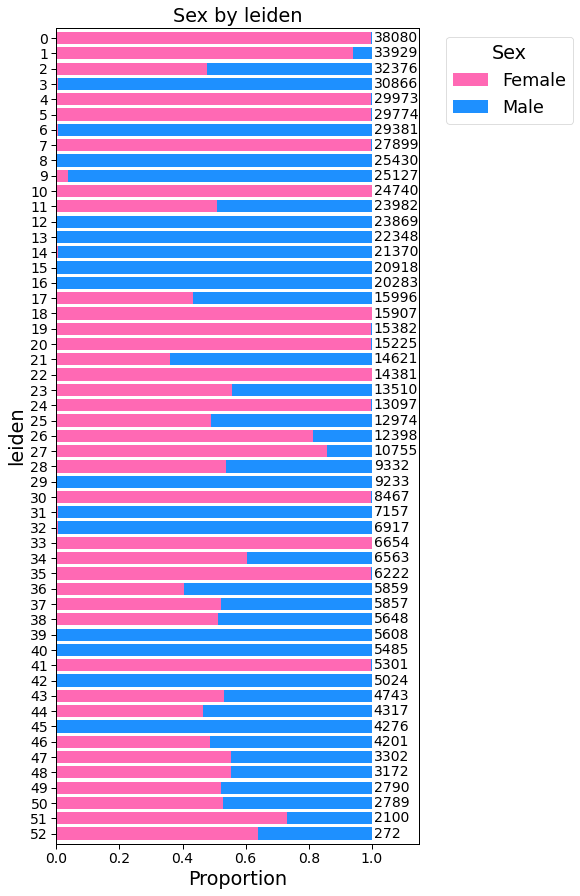

In [9]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Sex',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = sex_palette,
                            annotations = True)


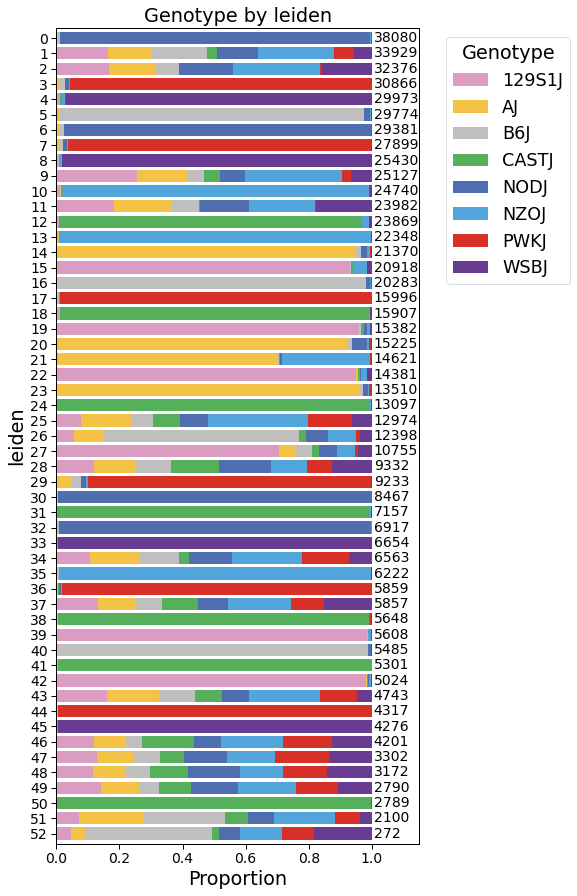

In [10]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Genotype',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = geno_palette,
                            annotations = True)


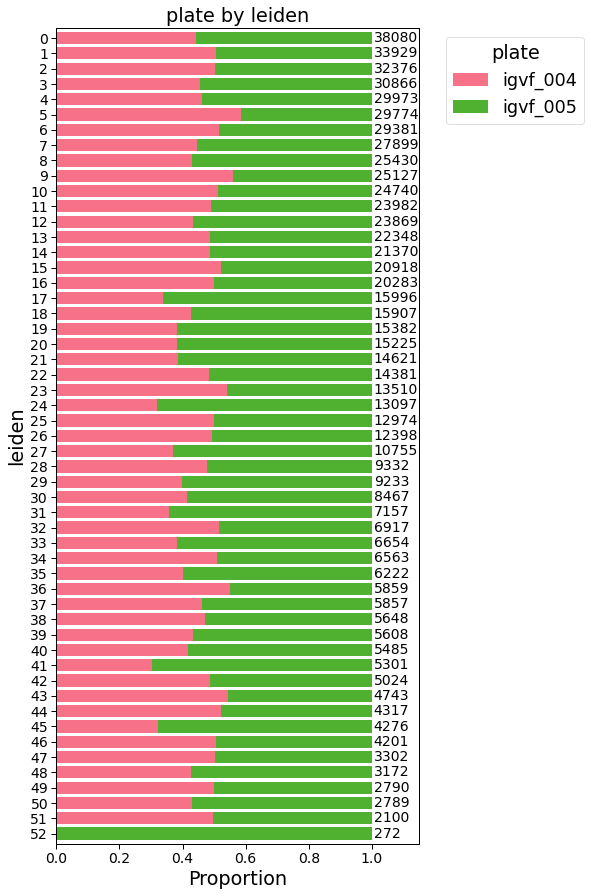

In [11]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'plate',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = plate_palette,
                            annotations = True)


In [13]:
marker_genes_dict = {
    "Hepatocyte": ["Alb","Arg1","Cyp2f2"],
    "LSEC": ['Lyve1','Flt4', 'Stab2'],

    "Midlobular_vascular_endothelial": ['Oit3'],

    "Fibroblast": ["Dcn","Pdgfra"],
    "Kupffer": ['C1qa','Cd163','Adgre1','Axl','Clec4f'],
    "Cholangiocyte": ["Epcam","Spp1","Sox9"],
    "T_cell": ['Il7r','Themis'],
    "Hepatic_stellate_cell": ['Lrat','Des','Acta2','Rbp1'],
    "Periportal_vascular_endothelial": ['Dll4','Efnb2','Ltbp4'],
    "B_cell": ['Pax5','Bcl11a'],
    "Cycling": ["Top2a","Mki67"],
    "Vascular_endothelial": ['Vwf'],
    "Pericentral_vascular_endothelial": ['Rspo3','Wnt2','Wnt9b'],
    "Stromal": ["Igfbp5"],
    "Macrophage": ["F13a1","Csf1r","Cd86"],
    "Dendritic": ['Irf8','Clec9a','Siglech'],

}  

categories: 0, 1, 2, etc.
var_group_labels: Hepatocyte, LSEC, Midlobular_vascular_endothelial, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


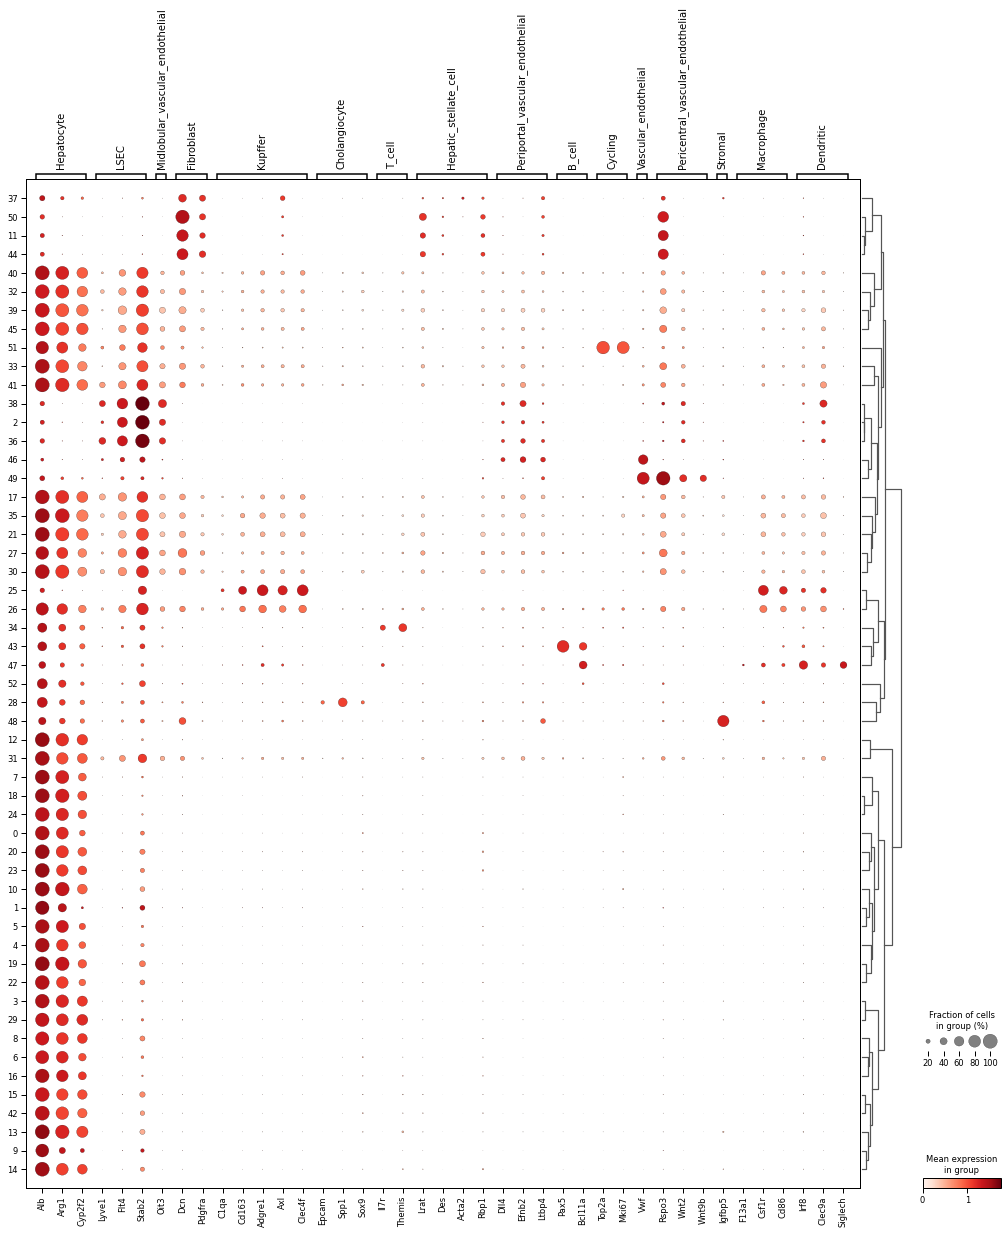

In [14]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


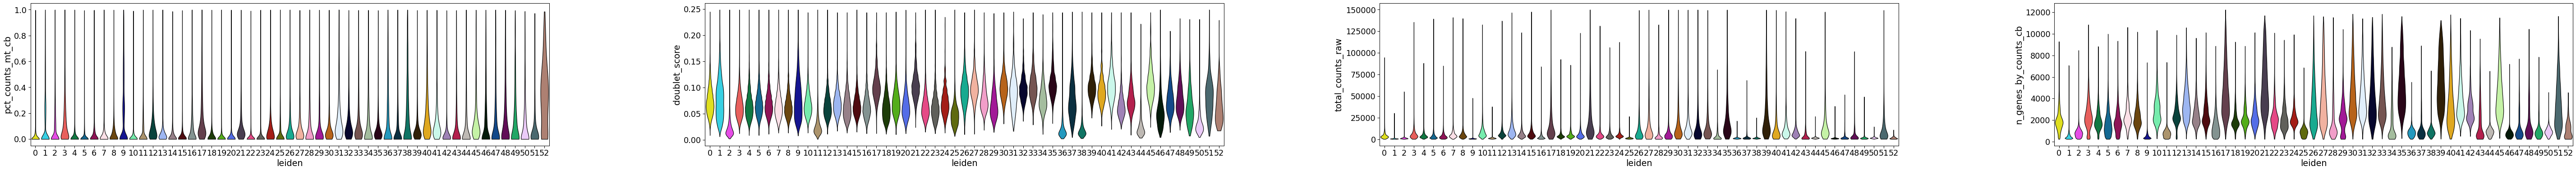

In [15]:
plt.rcParams['figure.figsize'] = (16, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "leiden", 
             jitter=0.4, multi_panel=True, size=0)

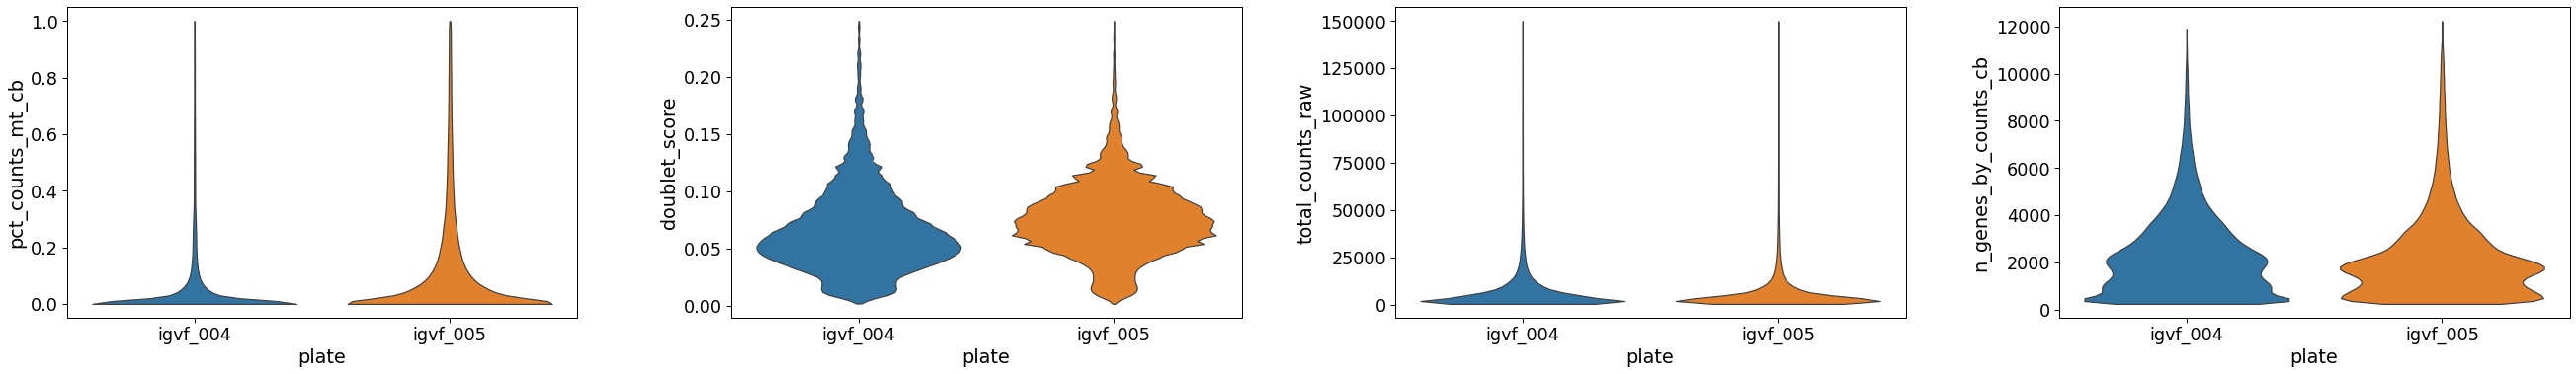

In [16]:
plt.rcParams['figure.figsize'] = (8, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "plate", 
             jitter=0.4, multi_panel=True, size=0)

In [17]:
plt.rcParams['figure.figsize'] = (8, 8)


In [ ]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


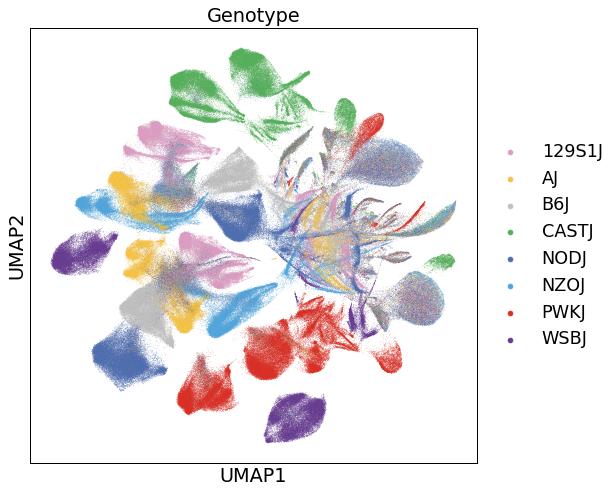

In [19]:
sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


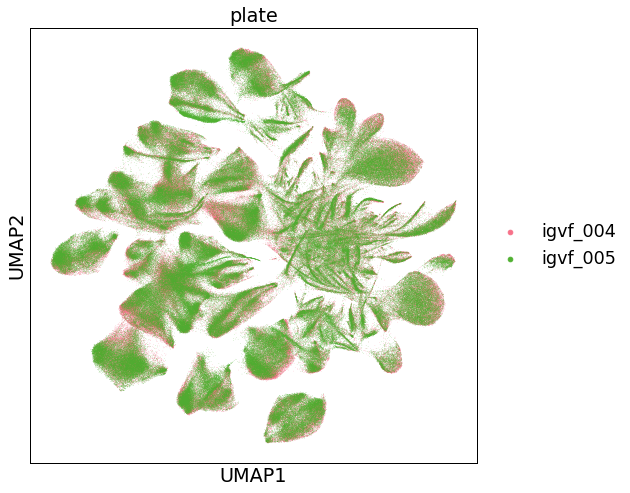

In [20]:
sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


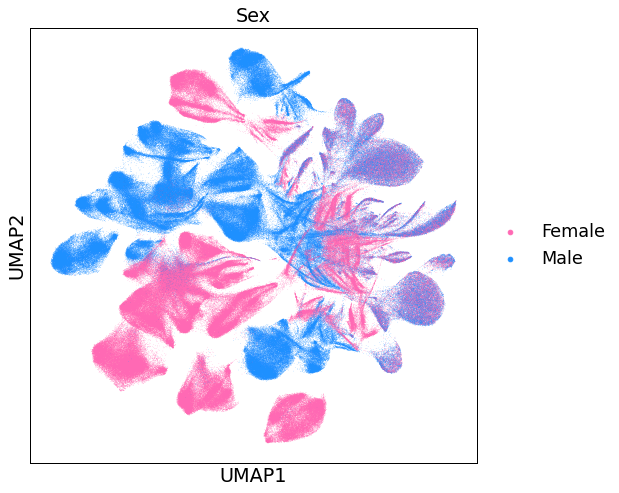

In [21]:
sc.pl.umap(adata, color=['Sex'], size = 0.8, palette = sex_palette)


In [22]:
adata

AnnData object with n_obs × n_vars = 745880 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'Multiplexed_sample1', 'Multiplexed_sample2', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap', 'dendrogram_leiden', '

In [23]:
plt.rcParams['figure.figsize'] = (8, 8)


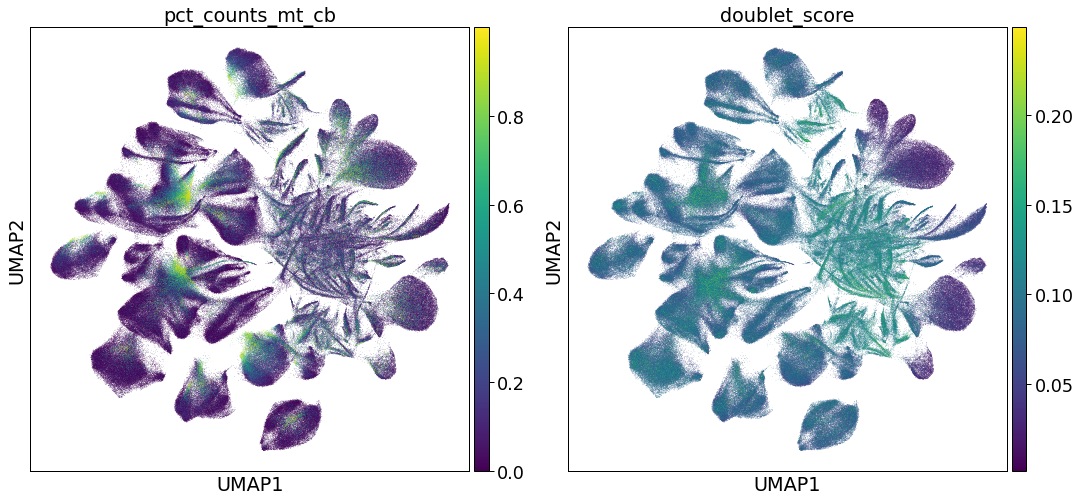

In [24]:
sc.pl.umap(adata, color=['pct_counts_mt_cb','doublet_score'], size = 0.8, palette = plate_palette)


In [8]:
plt.rcParams['figure.figsize'] = (8, 8)


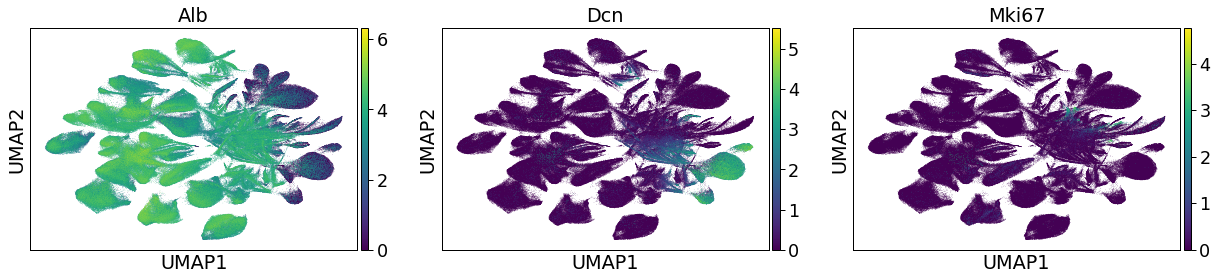

In [9]:
sc.pl.umap(adata, color=['Alb','Dcn','Mki67'], size = 0.8)


In [25]:
adata

AnnData object with n_obs × n_vars = 745880 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'Multiplexed_sample1', 'Multiplexed_sample2', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap', 'dendrogram_leiden', '

In [26]:
old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')
old_annots['subpool'] = old_annots['subpool'].str.replace(r'Sublibrary_(\d+)', r'Subpool_\1', regex=True)

subpool_mapping = {
    "13A": "Subpool_1",
    "13B": "Subpool_2",
    "13C": "Subpool_3",
    "13D": "Subpool_4",
    "13E": "Subpool_5",
    "13F": "Subpool_6",
    "13G": "Subpool_7",
    "13H": "Subpool_8"
}

# Update the subpool column for the specified plate
old_annots.loc[old_annots['plate'] == 'igvf_012', 'subpool'] = (
    old_annots['subpool'].map(subpool_mapping)
)


old_annots['cellID'] = old_annots['bc1_well'] + "_" + old_annots['bc2_well'] + "_" + old_annots['bc3_well'] + "_" + old_annots['subpool']  + "_" + old_annots['plate'] 



/tmp/ipykernel_3671814/134062919.py:1: DtypeWarning: Columns (11,22,23,31,36,37,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')


In [27]:
new_cells = adata.obs.index.tolist()
old_cells = old_annots['cellID'].tolist()

new_cells_series = pd.Series(new_cells)
old_cells_series = pd.Series(old_cells)


old_in_new = old_cells_series.isin(new_cells)
new_in_old = new_cells_series.isin(old_cells)


old_not_in_new = old_cells_series[~old_in_new]
new_not_in_old = new_cells_series[~new_in_old]

print(f"Number of old_cells not in new_cells: {len(old_not_in_new)}")

print(f"Number of new_cells not in old_cells: {len(new_not_in_old)}")


Number of old_cells not in new_cells: 121812
Number of new_cells not in old_cells: 46372


In [28]:
old_annots.set_index('cellID', inplace=True)
transfer_df = old_annots[['subtype', 'celltype']]

adata_obs = adata.obs.copy()

# Merge the dataframes, adding the 'subtype' and 'celltype' columns to adata.obs
adata_obs = adata_obs.join(transfer_df, how='left')


In [29]:
# Ensure missing values are explicitly set as NA
adata_obs['subtype'].fillna(value="NA", inplace=True)
adata_obs['celltype'].fillna(value="NA", inplace=True)

In [30]:
adata_obs.head()

lab_sample_id sample     plate    subpool  \
cellID                                                                        
E10_C4_G9_Subpool_4_igvf_004  037_129S1J_10M_05     NA  igvf_004  Subpool_4   
B9_H11_A3_Subpool_4_igvf_004    070_NODJ_10F_05     NA  igvf_004  Subpool_4   
D9_B9_F4_Subpool_4_igvf_004       030_AJ_10F_05     NA  igvf_004  Subpool_4   
B11_E4_A3_Subpool_4_igvf_004     024_B6J_10F_05     NA  igvf_004  Subpool_4   
E12_D8_C6_Subpool_4_igvf_004  041_129S1J_10M_05     NA  igvf_004  Subpool_4   

                             SampleType Tissue     Sex     Age Genotype  \
cellID                                                                    
E10_C4_G9_Subpool_4_igvf_004     Nuclei  Liver    Male  PNM_02   129S1J   
B9_H11_A3_Subpool_4_igvf_004     Nuclei  Liver  Female  PNM_02     NODJ   
D9_B9_F4_Subpool_4_igvf_004      Nuclei  Liver  Female  PNM_02       AJ   
B11_E4_A3_Subpool_4_igvf_004     Nuclei  Liver  Female  PNM_02      B6J   
E12_D8_C6_Subpool_4_igvf_004     Nuclei  Liver    Male  PNM_02   129S1J   

                             subpool_type  ... pct_counts_mt_cb doublet_score  \
cellID                                     ...                                  
E10_C4_G9_Subpool_4_igvf_004           NO  ...         0.894797      0.120823   
B9_H11_A3_Subpool_4_igvf_004           NO  ...         0.037211      0.076923   
D9_B9_F4_Subpool_4_igvf_004            NO  ...         0.607401      0.126437   
B11_E4_A3_Subpool_4_igvf_004           NO  ...         0.056707      0.179012   
E12_D8_C6_Subpool_4_igvf_004           NO  ...         0.160643      0.104126   

                             predicted_doublet background_fraction  \
cellID                                                               
E10_C4_G9_Subpool_4_igvf_004             False            0.001444   
B9_H11_A3_Subpool_4_igvf_004             False            0.001716   
D9_B9_F4_Subpool_4_igvf_004              False            0.001047   
B11_E4_A3_Subpool_4_igvf_004             False            0.001610   
E12_D8_C6_Subpool_4_igvf_004             False            0.001474   

                             cell_probability     cell_size  \
cellID                                                        
E10_C4_G9_Subpool_4_igvf_004         0.999955  59953.851562   
B9_H11_A3_Subpool_4_igvf_004         0.999955  59636.906250   
D9_B9_F4_Subpool_4_igvf_004          0.999955  59613.703125   
B11_E4_A3_Subpool_4_igvf_004         0.999955  59056.785156   
E12_D8_C6_Subpool_4_igvf_004         0.999955  58769.351562   

                             droplet_efficiency leiden      subtype  \
cellID                                                                
E10_C4_G9_Subpool_4_igvf_004                2.5     39  low quality   
B9_H11_A3_Subpool_4_igvf_004                2.5     30  low quality   
D9_B9_F4_Subpool_4_igvf_004                 2.5     21  low quality   
B11_E4_A3_Subpool_4_igvf_004                2.5     26  low quality   
E12_D8_C6_Subpool_4_igvf_004                2.5     39  low quality   

                                 celltype  
cellID                                     
E10_C4_G9_Subpool_4_igvf_004  low quality  
B9_H11_A3_Subpool_4_igvf_004  low quality  
D9_B9_F4_Subpool_4_igvf_004   low quality  
B11_E4_A3_Subpool_4_igvf_004  low quality  
E12_D8_C6_Subpool_4_igvf_004  low quality  

[5 rows x 52 columns]

In [31]:
adata.obs['celltype_carryover'] = adata_obs['celltype']
adata.obs['subtype_carryover'] = adata_obs['subtype']

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


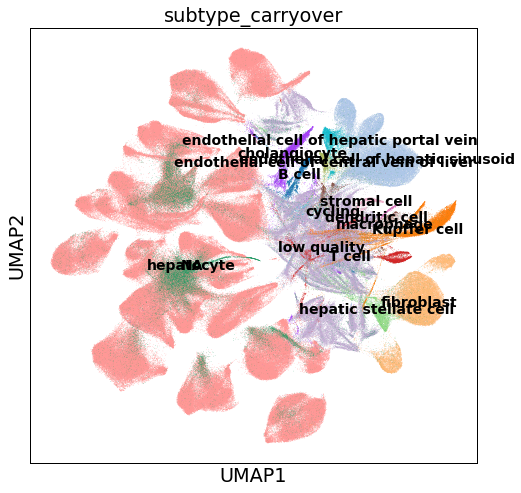

In [32]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1, legend_fontsize = 14, legend_loc = "on data")


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


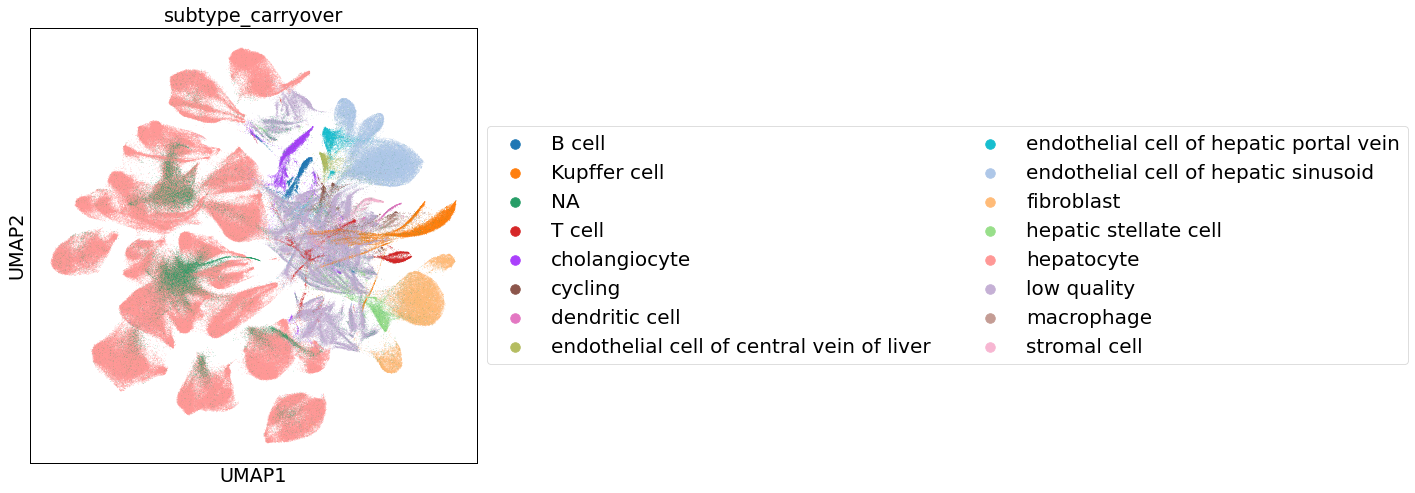

In [33]:
# Plot UMAP
ax = sc.pl.umap(adata, color=['subtype_carryover'], size=1, legend_fontsize=20, show=False)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=2, fontsize=20, ncol=2)
plt.show()

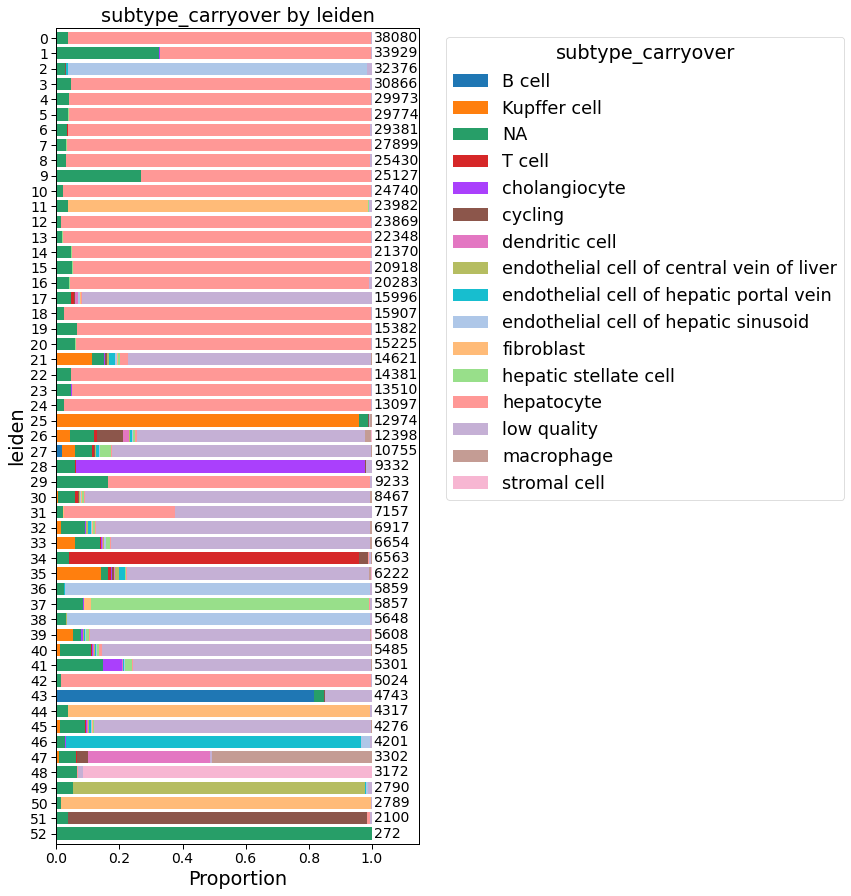

In [34]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'subtype_carryover',
                            reverse_order = True,
                            custom_colors = adata.uns["subtype_carryover_colors"],
                            fsize = (6.5,15), 
                            annotations = True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


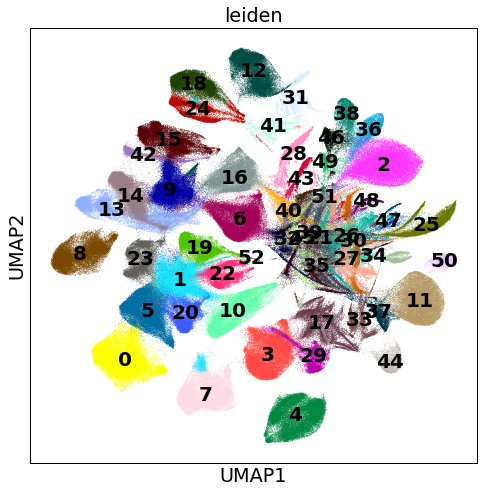

In [35]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 20, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


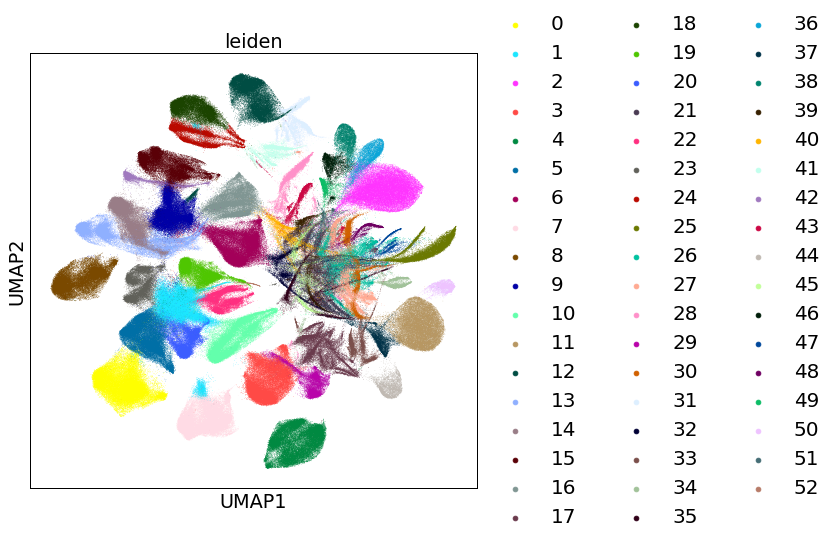

In [11]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 20)


# Annotate

In [10]:
annots = pd.read_csv("post_cellbender_annotations.csv")
annots = annots[annots['tissue'] == tissue]
annots['leiden'] = annots['leiden'].astype(str)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_celltype'].to_dict()
adata.obs['general_celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_CL_ID'].to_dict()
adata.obs['general_CL_ID'] = adata.obs['leiden'].map(annotation_dict)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['celltype'].to_dict()
adata.obs['celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['CL_ID'].to_dict()
adata.obs['CL_ID'] = adata.obs['leiden'].map(annotation_dict)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['subtype'].to_dict()
adata.obs['subtype'] = adata.obs['leiden'].map(annotation_dict)


In [11]:
plt.rcParams['figure.figsize'] = (8, 8)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


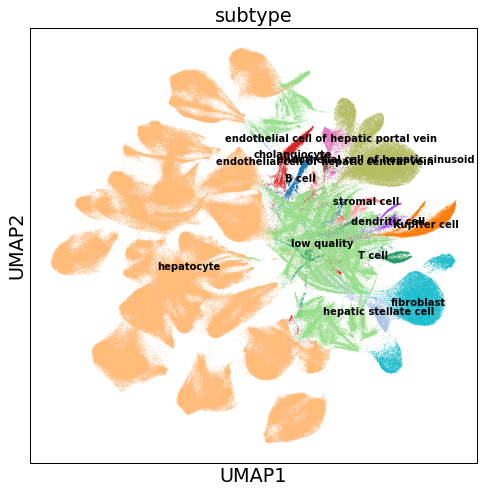

In [12]:
sc.pl.umap(adata, color=['subtype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


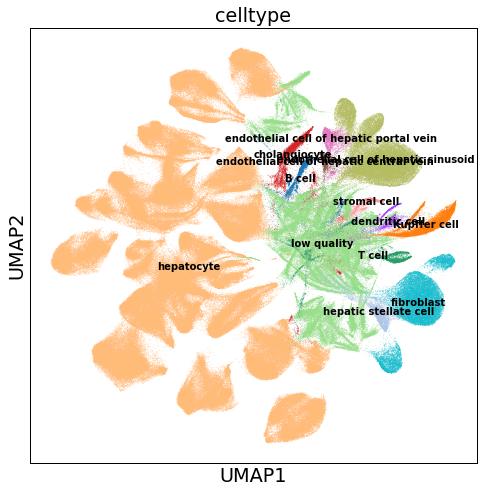

In [13]:
sc.pl.umap(adata, color=['celltype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


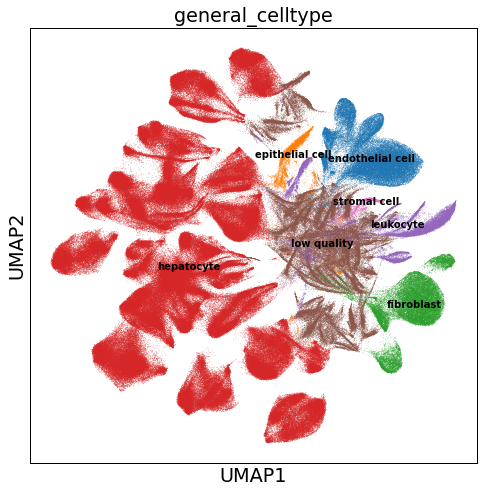

In [14]:
sc.pl.umap(adata, color=['general_celltype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


In [22]:
adata

AnnData object with n_obs × n_vars = 731687 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'general_celltype', 'general_CL_ID', 'celltype', 'CL_ID', 'subtype'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap',

In [ ]:
# adata.obs.drop(columns='celltype_carryover', inplace=True)
# adata.obs.drop(columns='subtype_carryover', inplace=True)

In [15]:
meta = adata.obs
meta.to_csv(f"../IGVF_analysis/cellbender_tissues/obs_tables/{tissue}_annotated_metadata.csv")


In [16]:
adata.write_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_annotated.h5ad')


In [4]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/annotated/{tissue}_annotated.h5ad')


In [5]:
adata.obs['subtype_genotype'] = adata.obs['subtype'].astype(str) + "_" + adata.obs['Genotype'].astype(str)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


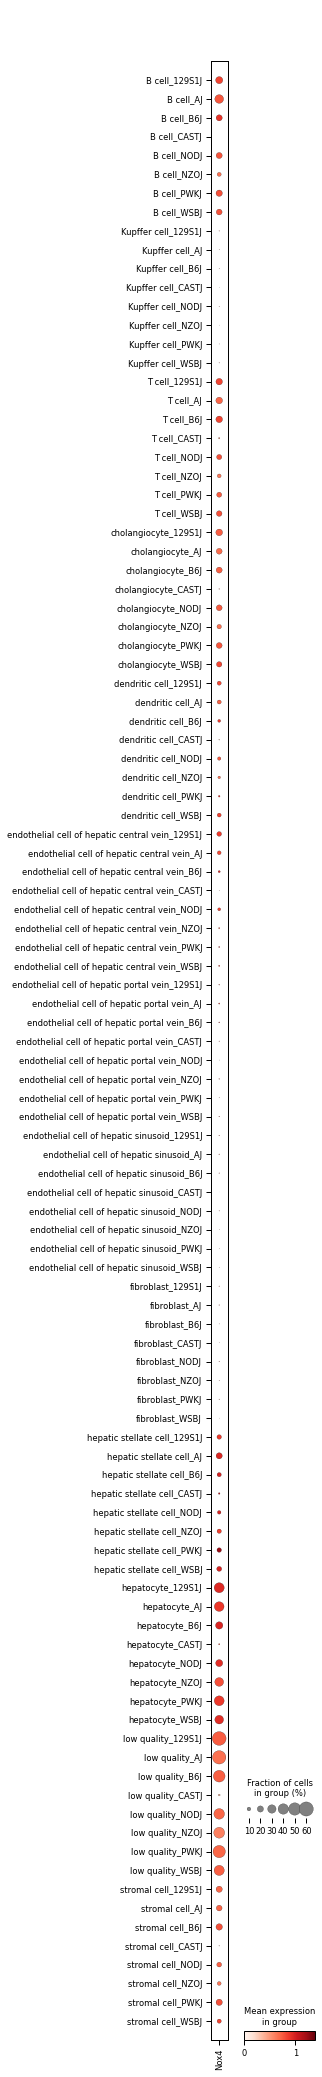

In [6]:
sc.pl.dotplot(adata, ['Nox4'], 'subtype_genotype', mean_only_expressed = True,
              dendrogram=False, log=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


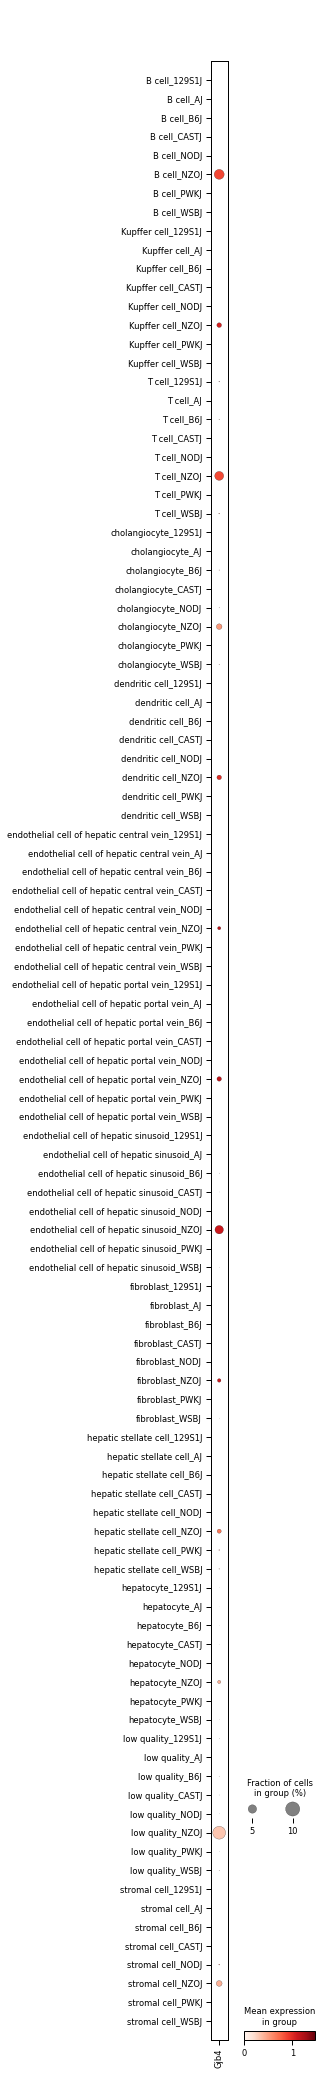

In [12]:
sc.pl.dotplot(adata, ['Gjb4'], 'subtype_genotype', mean_only_expressed = True,
              dendrogram=False, log=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


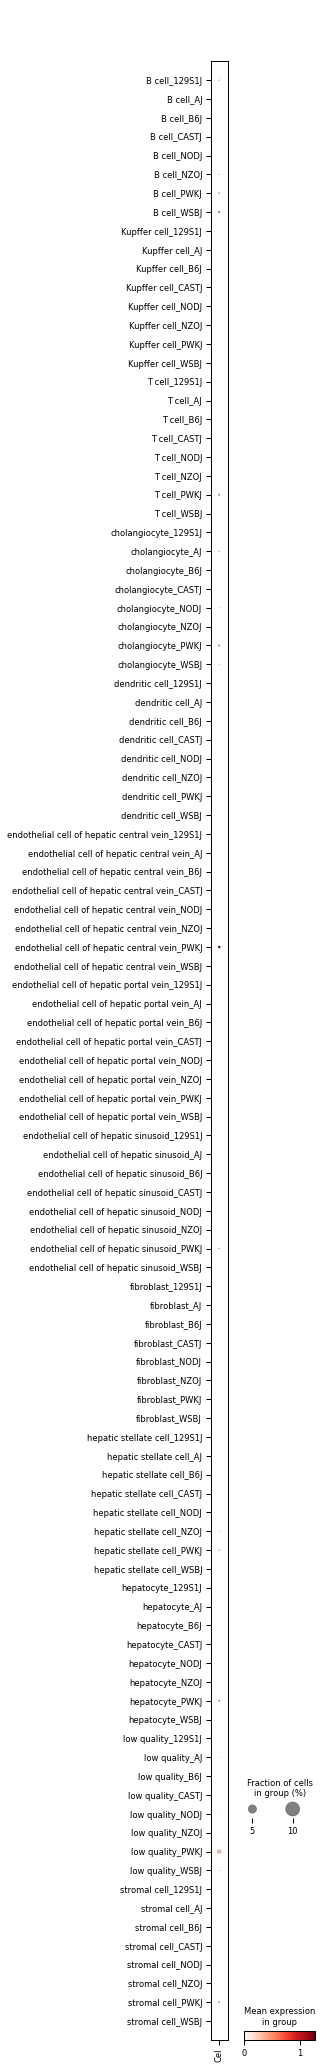

In [8]:
sc.pl.dotplot(adata, ['Cel'], 'subtype_genotype', mean_only_expressed = True,
              dendrogram=False, log=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


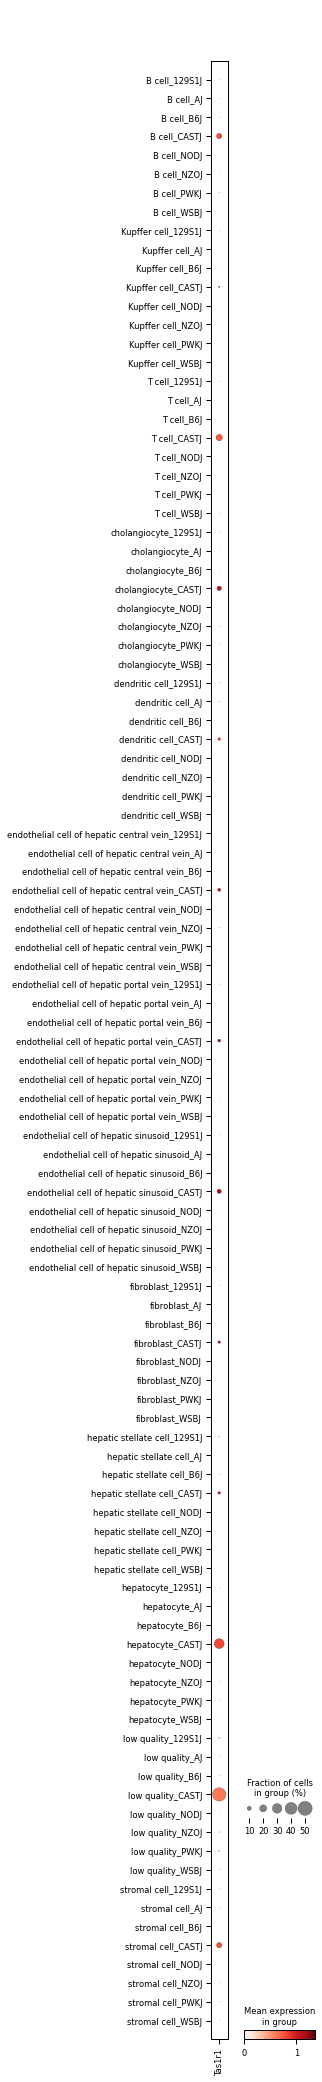

In [9]:
sc.pl.dotplot(adata, ['Tas1r1'], 'subtype_genotype', mean_only_expressed = True,
              dendrogram=False, log=True)
